# Real estate price

In [1]:
import pandas as pd
df = pd.read_csv('Real estate.csv')

In [2]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
df = df.drop(['No','X5 latitude','X6 longitude'], axis=1)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


In [4]:
df['X1 transaction date'] = df['X1 transaction date'].astype(str).str.extract(r'^(\d{4})')[0]
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    object 
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.3+ KB


In [6]:
df['X1 transaction date'] = df['X1 transaction date'].astype(int)
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012,32.0,84.87882,10,37.9
1,2012,19.5,306.59470,9,42.2
2,2013,13.3,561.98450,5,47.3
3,2013,13.3,561.98450,5,54.8
4,2012,5.0,390.56840,5,43.1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    int64  
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   Y house price of unit area              414 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


### Dataset Explanation

1. **X1 transaction date** (`int32`):  
   - Represents the year of the transaction, indicating when the real estate sale occurred.  
   - Example: 2012 or 2013.

2. **X2 house age** (`float64`):  
   - The age of the house in years at the time of the transaction.  
   - Example: 32.0 means the house is 32 years old.

3. **X3 distance to the nearest MRT station** (`float64`):  
   - The distance from the house to the nearest MRT station, measured in meters.  
   - Example: 84.87882 meters.

4. **X4 number of convenience stores** (`int64`):  
   - The number of convenience stores within a certain vicinity of the house.  
   - Example: 10 means there are 10 convenience stores nearby.

5. **Y house price of unit area** (`float64`):  
   - The price per unit area (e.g., per square meter) of the house during the transaction.  
   - Example: 37.9 means 37.9 currency units per square meter.


# Continue....

### Steps for Regression Analysis

#### **1. Split the Dataset**
- Split the data into **training (70%)** and **testing (30%)** subsets.
- Use the `train_test_split` function to ensure randomness in the split.
- Define:
  - **Features (X)**: `X1 transaction date`, `X2 house age`, `X3 distance to the nearest MRT station`, `X4 number of convenience stores`.
  - **Target (Y)**: `Y house price of unit area`.

#### **2. Check Correlation**
- Compute the correlation matrix to understand the relationships between features and the target variable.
- Visualize the correlation matrix using a **heatmap**:
  - Strong correlations between features and the target suggest potential predictors.
  - Identify multicollinearity (strong correlations between features), which might affect regression models.

#### **3. Apply Regression Models**

**a. Linear Regression**
1. Train a **Linear Regression** model using the training data.
2. Predict the target values using the testing data.

**b. Polynomial Regression**
1. Use `PolynomialFeatures` to generate polynomial terms for the features (e.g., degree = 2 or 3).
2. Train a **Linear Regression** model on the transformed polynomial features.
3. Predict the target values using the transformed testing data.

#### **4. Evaluate Model Performance**
- Evaluate both Linear and Polynomial Regression models using:
  1. **Mean Squared Error (MSE)**:
     - Measures the average squared difference between predicted and actual values.
     - Lower MSE indicates better performance.
  2. **R-squared (R²)**:
     - Measures how well the model explains the variability of the target variable.
     - Higher R² indicates better performance.
- Compare the results to determine which model performs better.

#### **5. Visualize Results**
- Plot **actual vs. predicted values** for both Linear and Polynomial Regression.
- For Polynomial Regression, visualize the curve fitting to see how well it models the data.


# 1. Split the Dataset

from sklearn.model_selection import train_test_split as tts

In [10]:
from sklearn.model_selection import train_test_split as tts

In [11]:
train, test = tts(df, test_size=.30)

In [12]:
train.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
230,2013,4.0,2147.3760,3,33.4
133,2012,18.0,373.3937,8,39.5
95,2012,8.0,104.8101,5,51.8
277,2013,21.2,2185.1280,3,27.7
382,2013,16.3,3529.5640,0,29.3


In [13]:
test.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
346,2013,13.2,1712.63200,2,30.8
93,2012,31.9,1146.32900,0,16.1
172,2013,6.6,90.45606,9,58.1
345,2012,0.0,185.42960,0,37.9
242,2012,2.0,2077.39000,3,33.4


In [14]:
X = df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']] 
Y= df[['Y house price of unit area']]

In [15]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
0,2012,32.0,84.87882,10
1,2012,19.5,306.59470,9
2,2013,13.3,561.98450,5
3,2013,13.3,561.98450,5
4,2012,5.0,390.56840,5


In [16]:
Y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [17]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size=0.3, random_state=42)

In [18]:
print ("(""X_train.shape = ",X_train.shape)
print ("(""Y_train.shape = ",Y_train.shape)
print("\n")
print ("(""X_test.shape = ",X_test.shape)
print ("(""Y_test.shape = ",Y_test.shape)

(X_train.shape =  (289, 4)
(Y_train.shape =  (289, 1)


(X_test.shape =  (125, 4)
(Y_test.shape =  (125, 1)


# 2. Check Correlation

In [19]:
df.corr()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
X1 transaction date,1.000000,0.049171,0.016519,-0.005586,0.081545
X2 house age,0.049171,1.000000,0.025622,0.049593,-0.210567
X3 distance to the nearest MRT station,0.016519,0.025622,1.000000,-0.602519,-0.673613
X4 number of convenience stores,-0.005586,0.049593,-0.602519,1.000000,0.571005
Y house price of unit area,0.081545,-0.210567,-0.673613,0.571005,1.000000


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

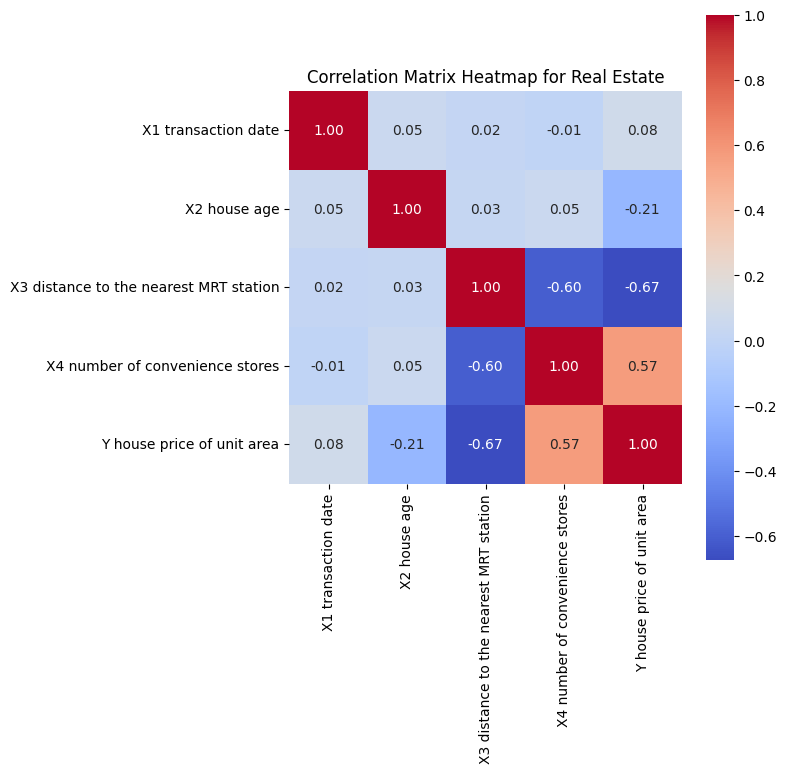

In [21]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap for Real Estate")
plt.tight_layout()
plt.show()

# 3. Apply Regression Models

## a. Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [23]:
reg = LinearRegression()
reg.fit(X_train, Y_train)

print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [[ 2.78410294 -0.23257624 -0.00558695  1.27087806]]
Intercept: [-5560.45186776]


In [24]:
Y_pred = reg.predict(X_test)

print("Predicted values: \n", Y_pred[:5])
print("\nActual values:\n", Y_test[:5].values)

Predicted values: 
 [[50.23523426]
 [44.48165868]
 [43.68731994]
 [38.52990187]
 [28.06963547]]

Actual values:
 [[45.1]
 [42.3]
 [52.2]
 [37.3]
 [22.8]]


## b. Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=4, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
reg_2 = LinearRegression()
reg_2.fit(X_train_poly, Y_train)

In [ ]:
Y_pred_poly = reg_2.predict(X_test_poly)

print("Predicted values:\n", Y_pred_poly[:5])
print("\nActual values:\n", Y_test[:5].values)

# 4. Evaluate Model Performance

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse_linear = mean_squared_error(Y_test, Y_pred)
mse_poly = mean_squared_error(Y_test, Y_pred_poly)

r2_linear = r2_score(Y_test, Y_pred)
r2_poly = r2_score(Y_test, Y_pred_poly)

print("Linear Regression:")
print(f"  MSE: {mse_linear:.4f}")
print(f"  R²: {r2_linear:.4f}")

print("\nPolynomial Regression:")
print(f"  MSE: {mse_poly:.4f}")
print(f"  R²: {r2_poly:.4f}")

# 5. Visualize Results

In [ ]:
plt.figure(figsize=(12, 5))

# Linear Regression
plt.subplot(1, 2, 1)

plt.scatter(Y_test, Y_pred, alpha=0.6, color='blue', label="Predicted")
plt.plot(Y_test, Y_test, color='red', label="Perfect Fit (y=x)")
plt.title("Linear Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

# Polynomial Regression
plt.subplot(1, 2, 2)

plt.scatter(Y_test, Y_pred_poly, alpha=0.6, color='green', label="Predicted")
plt.plot(Y_test, Y_test, color='red', label="Perfect Fit (y=x)")
plt.title("Polynomial Regression: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))


sns.regplot(x=Y_test, y=Y_pred_poly, scatter_kws={"alpha": 0.4, "color": "black"}, line_kws={"color": "orange"}, label="Predicted")



plt.xlabel("Actual Values (Y_test)")
plt.ylabel("Predicted Values (Y_pred_poly)")
plt.title("Actual vs. Predicted (Polynomial Regression)")
plt.legend()
plt.show()